[View in Colaboratory](https://colab.research.google.com/github/mohanrajmit/Face-Recognition-data/blob/master/Face_Recognition.ipynb)

In [1]:
!pip install cmake

!pip install dlib

    100% |████████████████████████████████| 17.7MB 2.1MB/s 
    100% |████████████████████████████████| 3.3MB 10.5MB/s 
  Running setup.py bdist_wheel for dlib ... - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | done
  Stored in directory: /root/.cache/pip/wheels/ce/f9/bc/1c51cd0b40a2b5dfd46ab79a73832b41e7c3aa918a508154f0
Successfully built dlib


In [2]:
!pip3 install face_recognition

    100% |████████████████████████████████| 100.2MB 330kB/s 
    100% |████████████████████████████████| 81kB 24.8MB/s 
  Running setup.py bdist_wheel for face-recognition-models ... - \ | / - \ | / done
  Stored in directory: /root/.cache/pip/wheels/d2/99/18/59c6c8f01e39810415c0e63f5bede7d83dfb0ffc039865465f
Successfully built face-recognition-models


In [2]:
!rm -rf Face-Recognition-data
!git clone https://github.com/mohanrajmit/Face-Recognition-data.git

Cloning into 'Face-Recognition-data'...
remote: Enumerating objects: 7, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 289 (delta 0), reused 0 (delta 0), pack-reused 282
Receiving objects: 100% (289/289), 83.86 MiB | 59.43 MiB/s, done.
Resolving deltas: 100% (23/23), done.


In [3]:
!ls

encodings.pickle  Face-Recognition-data  trained_knn_model.clf
face_recognition  sample_data


In [15]:
!pip3 install imutils

  Running setup.py bdist_wheel for imutils ... - done
  Stored in directory: /root/.cache/pip/wheels/4c/ff/aa/824fb9efc5b8c740d54cd8bc19c7e85fbb8d115c77e56812c7
Successfully built imutils


In [4]:
from imutils import paths
import face_recognition
#import argparse
import pickle
import cv2
import os
# grab the paths to the input images in our dataset
print("[INFO] quantifying faces...")
imagePaths = list(paths.list_images("Face-Recognition-data/facedata/"))

# initialize the list of known encodings and known names
knownEncodings = []
knownNames = []

# loop over the image paths
for (i, imagePath) in enumerate(imagePaths):
	# extract the person name from the image path
	print("[INFO] processing image {}/{}".format(i + 1,len(imagePaths)))
	name = imagePath.split(os.path.sep)[-2]
  #print(name)

	# load the input image and convert it from RGB (OpenCV ordering)
	# to dlib ordering (RGB)
	image = cv2.imread(imagePath)
	rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

	# detect the (x, y)-coordinates of the bounding boxes
	# corresponding to each face in the input image
	boxes = face_recognition.face_locations(rgb,model="cnn")

	# compute the facial embedding for the face
	encodings = face_recognition.face_encodings(rgb, boxes)

	# loop over the encodings
	for encoding in encodings:
		# add each encoding + name to our set of known names and
		# encodings
		knownEncodings.append(encoding)
		knownNames.append(name)

# dump the facial encodings + names to disk
print("[INFO] serializing encodings...")
data = {"encodings": knownEncodings, "names": knownNames}
f = open("encodings.pickle", "wb")
f.write(pickle.dumps(data))
f.close()

[INFO] quantifying faces...
[INFO] processing image 1/44
[INFO] processing image 2/44
[INFO] processing image 3/44
[INFO] processing image 4/44
[INFO] processing image 5/44
[INFO] processing image 6/44
[INFO] processing image 7/44
[INFO] processing image 8/44
[INFO] processing image 9/44
[INFO] processing image 10/44
[INFO] processing image 11/44
[INFO] processing image 12/44
[INFO] processing image 13/44
[INFO] processing image 14/44
[INFO] processing image 15/44
[INFO] processing image 16/44
[INFO] processing image 17/44
[INFO] processing image 18/44
[INFO] processing image 19/44
[INFO] processing image 20/44
[INFO] processing image 21/44
[INFO] processing image 22/44
[INFO] processing image 23/44
[INFO] processing image 24/44
[INFO] processing image 25/44
[INFO] processing image 26/44
[INFO] processing image 27/44
[INFO] processing image 28/44
[INFO] processing image 29/44
[INFO] processing image 30/44
[INFO] processing image 31/44
[INFO] processing image 32/44
[INFO] processing ima

In [5]:
!ls

encodings.pickle  Face-Recognition-data  trained_knn_model.clf
face_recognition  sample_data


In [0]:
import face_recognition
#import argparse
import pickle
import cv2

[INFO] loading encodings...
[INFO] recognizing faces...
ian_malcolm
alan_grant


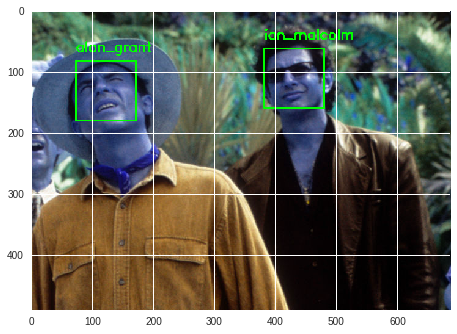

In [7]:

import matplotlib.pyplot as plt
# load the known faces and embeddings
print("[INFO] loading encodings...")
data = pickle.loads(open("encodings.pickle", "rb").read())

# load the input image and convert it from BGR to RGB
image = cv2.imread("Face-Recognition-data/examples/example_01.png")
rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# detect the (x, y)-coordinates of the bounding boxes corresponding
# to each face in the input image, then compute the facial embeddings
# for each face
print("[INFO] recognizing faces...")
boxes = face_recognition.face_locations(rgb,model="cnn")
encodings = face_recognition.face_encodings(rgb, boxes)

# initialize the list of names for each face detected
names = []

# loop over the facial embeddings
for encoding in encodings:
	# attempt to match each face in the input image to our known
	# encodings
	matches = face_recognition.compare_faces(data["encodings"],
		encoding)
	name = "Unknown"

	# check to see if we have found a match
	if True in matches:
		# find the indexes of all matched faces then initialize a
		# dictionary to count the total number of times each face
		# was matched
		matchedIdxs = [i for (i, b) in enumerate(matches) if b]
		counts = {}

		# loop over the matched indexes and maintain a count for
		# each recognized face face
		for i in matchedIdxs:
			name = data["names"][i]
			counts[name] = counts.get(name, 0) + 1

		# determine the recognized face with the largest number of
		# votes (note: in the event of an unlikely tie Python will
		# select first entry in the dictionary)
		name = max(counts, key=counts.get)
	
	# update the list of names
	names.append(name)

# loop over the recognized faces
for ((top, right, bottom, left), name) in zip(boxes, names):
  # draw the predicted face name on the image
  cv2.rectangle(image, (left, top), (right, bottom), (0, 255, 0), 2)
  y = top - 15 if top - 15 > 15 else top + 15
  cv2.putText(image, name, (left, y), cv2.FONT_HERSHEY_SIMPLEX,0.75, (0, 255, 0), 2)
  print(name)

# show the output image
#cv2.imshow("Image", image)
plt.imshow(image)
